<a href="https://colab.research.google.com/github/Manu-Gr/NLP-Project---Text-Summarization/blob/main/NLP_Project_Text_Summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Necessary Libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [79]:
file = open('automate the boring stuff with python automate the boring stuff with python ( PDFDrive ).pdf','rb')

In [80]:
file

<_io.BufferedReader name='automate the boring stuff with python automate the boring stuff with python ( PDFDrive ).pdf'>

In [81]:
pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [82]:
import PyPDF2

In [83]:
pdf_reader = PyPDF2.PdfFileReader(file)

In [84]:
pdf_reader

In [85]:
help(pdf_reader)

Help on PdfFileReader in module PyPDF2._reader object:

class PdfFileReader(PdfReader)
 |  PdfFileReader(*args: Any, **kwargs: Any) -> None
 |  
 |  Initialize a PdfReader object.
 |  
 |  This operation can take some time, as the PDF stream's cross-reference
 |  tables are read into memory.
 |  
 |  :param stream: A File object or an object that supports the standard read
 |      and seek methods similar to a File object. Could also be a
 |      string representing a path to a PDF file.
 |  :param bool strict: Determines whether user should be warned of all
 |      problems and also causes some correctable problems to be fatal.
 |      Defaults to ``False``.
 |  :param None/str/bytes password: Decrypt PDF file at initialization. If the
 |      password is None, the file will not be decrypted.
 |      Defaults to ``None``
 |  
 |  Method resolution order:
 |      PdfFileReader
 |      PdfReader
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, *args: Any, *

In [86]:
pdf_reader.getIsEncrypted()

False

In [87]:
pdf_reader.getNumPages()

505

In [88]:
page1 = pdf_reader.getPage(0)

In [89]:
print(page1.extractText())

PRACTICAL PROGRAMMING
 
FOR TOTAL 
BEGINNERS
AL SWEIGART
AUTOMATE 
THE BORING STUFF
WITH PYTHON
AUTOMATE 
THE BORING STUFF
WITH PYTHON
SHELVE IN:
PROGRAMMING LANGUAGES/

PYTHON
$
29
.95 
($
34
.95 CDN)
www.nostarch.com
THEF
IN
ES
T 
I
N 
G
EE
KENTE
RT
AINMENT
Ž
If you™ve ever spent hours renaming files or updating
hundreds of spreadsheet cells, you know how tedious 

tasks like these can be. But what if you could have  

your computer do them for you?
minutes what would take you hours to do by hand
Š
learn how to use Python to write programs that do in 
In 
Automate the Boring Stuff with Python
, you™ll
no prior programming experience required. Once
create Python programs that effortlessly perform 
useful and impressive feats of automation to:
ﬁ
I 
LIEFLAT.ﬂ
Thi
s 
boo
k 
use
sa 
dur
ab
l
e 
bindin
g 
tha
t 
won™
t 
sna
p 
shu
t.
you™ve mastered the basics of programming, you™ll
Search for text in a file or across multiple files
Create, update, move, and rename files and
folders
Search

In [90]:
page2 = pdf_reader.getPage(1)


In [91]:
print(page2.extractText())

AUTOM
A
TE THE BORING STUFF 
WITH PYTHON



In [92]:
page3 = pdf_reader.getPage(3)

In [93]:
print(page3.extractText())

AUTOM
A
TE THE BORING STUFF W
ITH PYTHON.
 Copyright © 2015 by Al Sweigart.
All rights reserved. No part of this work may be reproduced or transmitted in any form or by any means, 
electronic or mechanical, including photocopying, recording, or by any information storage or retrieval 

system, without the prior written permission of the copyright owner and the publisher.
Printed in USA

Second printing

19 18 17 16 15
  
2 3 4 5 6 7 8 9
ISBN-10: 1-59327-599-4
ISBN-13: 978-1-59327-599-0
Publisher: William Pollock
Production Editor: Laurel Chun

Cover Illustration: Josh Ellingson 

Interior Design: Octopod Studios

Developmental Editors: Jennifer Griffith-Delgado, Greg Poulos, and Leslie Shen

Technical Reviewer: Ari Lacenski

Copyeditor: Kim Wimpsett

Compositor: Susan Glinert Stevens

Proofreader: Lisa Devoto Farrell 

Indexer: BIM Indexing and Proofreading Services
For information on distribution, translations, or bulk sales,  
please contact No Starch Press, Inc. directly:
No Starch 

In [94]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation

In [95]:
stopwords = list(STOP_WORDS)

In [96]:
nlp = spacy.load('en_core_web_sm')

In [97]:
txt = ''' Commercial products
In 2022 Google Docs released an automatic summarization feature.[6]

Approaches
There are two general approaches to automatic summarization: extraction and abstraction.

Extraction-based summarization
Here, content is extracted from the original data, but the extracted content is not modified in any way. Examples of extracted content include key-phrases that can be used to "tag" or index a text document, or key sentences (including headings) that collectively comprise an abstract, and representative images or video segments, as stated above. For text, extraction is analogous to the process of skimming, where the summary (if available), headings and subheadings, figures, the first and last paragraphs of a section, and optionally the first and last sentences in a paragraph are read before one chooses to read the entire document in detail.[7] Other examples of extraction that include key sequences of text in terms of clinical relevance (including patient/problem, intervention, and outcome).[8]

Abstraction-based summarization
This has been applied mainly for text. Abstractive methods build an internal semantic representation of the original content, and then use this representation to create a summary that is closer to what a human might express. Abstraction may transform the extracted content by paraphrasing sections of the source document, to condense a text more strongly than extraction. Such transformation, however, is computationally much more challenging than extraction, involving both natural language processing and often a deep understanding of the domain of the original text in cases where the original document relates to a special field of knowledge. "Paraphrasing" is even more difficult to apply to image and video, which is why most summarization systems are extractive.

Aided summarization
Approaches aimed at higher summarization quality rely on combined software and human effort. In Machine Aided Human Summarization, extractive techniques highlight candidate passages for inclusion (to which the human adds or removes text). In Human Aided Machine Summarization, a human post-processes software output, in the same way that one edits the output of automatic translation by Google Translate.

Applications and systems for summarization
There are broadly two types of extractive summarization tasks depending on what the summarization program focuses on. The first is generic summarization, which focuses on obtaining a generic summary or abstract of the collection (whether documents, or sets of images, or videos, news stories etc.). The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query. Summarization systems are able to create both query relevant text summaries and generic machine-generated summaries depending on what the user needs.

An example of a summarization problem is document summarization, which attempts to automatically produce an abstract from a given document. Sometimes one might be interested in generating a summary from a single source document, while others can use multiple source documents (for example, a cluster of articles on the same topic). This problem is called multi-document summarization. A related application is summarizing news articles. Imagine a system, which automatically pulls together news articles on a given topic (from the web), and concisely represents the latest news as a summary.

Image collection summarization is another application example of automatic summarization. It consists in selecting a representative set of images from a larger set of images.[9] A summary in this context is useful to show the most representative images of results in an image collection exploration system. Video summarization is a related domain, where the system automatically creates a trailer of a long video. This also has applications in consumer or personal videos, where one might want to skip the boring or repetitive actions. Similarly, in surveillance videos, one would want to extract important and suspicious activity, while ignoring all the boring and redundant frames captured.

At a very high level, summarization algorithms try to find subsets of objects (like set of sentences, or a set of images), which cover information of the entire set. This is also called the core-set. These algorithms model notions like diversity, coverage, information and representativeness of the summary. Query based summarization techniques, additionally model for relevance of the summary with the query. Some techniques and algorithms which naturally model summarization problems are TextRank and PageRank, Submodular set function, Determinantal point process, maximal marginal relevance (MMR) etc.

Keyphrase extraction
The task is the following. You are given a piece of text, such as a journal article, and you must produce a list of keywords or key[phrase]s that capture the primary topics discussed in the text.[10] In the case of research articles, many authors provide manually assigned keywords, but most text lacks pre-existing keyphrases. For example, news articles rarely have keyphrases attached, but it would be useful to be able to automatically do so for a number of applications discussed below. Consider the example text from a news article:

"The Army Corps of Engineers, rushing to meet President Bush's promise to protect New Orleans by the start of the 2006 hurricane season, installed defective flood-control pumps last year despite warnings from its own expert that the equipment would fail during a storm, according to documents obtained by The Associated Press".
A keyphrase extractor might select "Army Corps of Engineers", "President Bush", "New Orleans", and "defective flood-control pumps" as keyphrases. These are pulled directly from the text. In contrast, an abstractive keyphrase system would somehow internalize the content and generate keyphrases that do not appear in the text, but more closely resemble what a human might produce, such as "political negligence" or "inadequate protection from floods". Abstraction requires a deep understanding of the text, which makes it difficult for a computer system. Keyphrases have many applications. They can enable document browsing by providing a short summary, improve information retrieval (if documents have keyphrases assigned, a user could search by keyphrase to produce more reliable hits than a full-text search), and be employed in generating index entries for a large text corpus.

Depending on the different literature and the definition of key terms, words or phrases, keyword extraction is a highly related theme.

Supervised learning approaches
Beginning with the work of Turney,[11] many researchers have approached keyphrase extraction as a supervised machine learning problem. Given a document, we construct an example for each unigram, bigram, and trigram found in the text (though other text units are also possible, as discussed below). We then compute various features describing each example (e.g., does the phrase begin with an upper-case letter?). We assume there are known keyphrases available for a set of training documents. Using the known keyphrases, we can assign positive or negative labels to the examples. Then we learn a classifier that can discriminate between positive and negative examples as a function of the features. Some classifiers make a binary classification for a test example, while others assign a probability of being a keyphrase. For instance, in the above text, we might learn a rule that says phrases with initial capital letters are likely to be keyphrases. After training a learner, we can select keyphrases for test documents in the following manner. We apply the same example-generation strategy to the test documents, then run each example through the learner. We can determine the keyphrases by looking at binary classification decisions or probabilities returned from our learned model. If probabilities are given, a threshold is used to select the keyphrases. Keyphrase extractors are generally evaluated using precision and recall. Precision measures how many of the proposed keyphrases are actually correct. Recall measures how many of the true keyphrases your system proposed. The two measures can be combined in an F-score, which is the harmonic mean of the two (F = 2PR/(P + R) ). Matches between the proposed keyphrases and the known keyphrases can be checked after stemming or applying some other text normalization.

Designing a supervised keyphrase extraction system involves deciding on several choices (some of these apply to unsupervised, too). The first choice is exactly how to generate examples. Turney and others have used all possible unigrams, bigrams, and trigrams without intervening punctuation and after removing stopwords. Hulth showed that you can get some improvement by selecting examples to be sequences of tokens that match certain patterns of part-of-speech tags. Ideally, the mechanism for generating examples produces all the known labeled keyphrases as candidates, though this is often not the case. For example, if we use only unigrams, bigrams, and trigrams, then we will never be able to extract a known keyphrase containing four words. Thus, recall may suffer. However, generating too many examples can also lead to low precision.

We also need to create features that describe the examples and are informative enough to allow a learning algorithm to discriminate keyphrases from non- keyphrases. Typically features involve various term frequencies (how many times a phrase appears in the current text or in a larger corpus), the length of the example, relative position of the first occurrence, various boolean syntactic features (e.g., contains all caps), etc. The Turney paper used about 12 such features. Hulth uses a reduced set of features, which were found most successful in the KEA (Keyphrase Extraction Algorithm) work derived from Turney's seminal paper.

In the end, the system will need to return a list of keyphrases for a test document, so we need to have a way to limit the number. Ensemble methods (i.e., using votes from several classifiers) have been used to produce numeric scores that can be thresholded to provide a user-provided number of keyphrases. This is the technique used by Turney with C4.5 decision trees. Hulth used a single binary classifier so the learning algorithm implicitly determines the appropriate number.

Once examples and features are created, we need a way to learn to predict keyphrases. Virtually any supervised learning algorithm could be used, such as decision trees, Naive Bayes, and rule induction. In the case of Turney's GenEx algorithm, a genetic algorithm is used to learn parameters for a domain-specific keyphrase extraction algorithm. The extractor follows a series of heuristics to identify keyphrases. The genetic algorithm optimizes parameters for these heuristics with respect to performance on training documents with known key phrases.

Unsupervised approach: TextRank
Another keyphrase extraction algorithm is TextRank. While supervised methods have some nice properties, like being able to produce interpretable rules for what features characterize a keyphrase, they also require a large amount of training data. Many documents with known keyphrases are needed. Furthermore, training on a specific domain tends to customize the extraction process to that domain, so the resulting classifier is not necessarily portable, as some of Turney's results demonstrate. Unsupervised keyphrase extraction removes the need for training data. It approaches the problem from a different angle. Instead of trying to learn explicit features that characterize keyphrases, the TextRank algorithm[12] exploits the structure of the text itself to determine keyphrases that appear "central" to the text in the same way that PageRank selects important Web pages. Recall this is based on the notion of "prestige" or "recommendation" from social networks. In this way, TextRank does not rely on any previous training data at all, but rather can be run on any arbitrary piece of text, and it can produce output simply based on the text's intrinsic properties. Thus the algorithm is easily portable to new domains and languages.

TextRank is a general purpose graph-based ranking algorithm for NLP. Essentially, it runs PageRank on a graph specially designed for a particular NLP task. For keyphrase extraction, it builds a graph using some set of text units as vertices. Edges are based on some measure of semantic or lexical similarity between the text unit vertices. Unlike PageRank, the edges are typically undirected and can be weighted to reflect a degree of similarity. Once the graph is constructed, it is used to form a stochastic matrix, combined with a damping factor (as in the "random surfer model"), and the ranking over vertices is obtained by finding the eigenvector corresponding to eigenvalue 1 (i.e., the stationary distribution of the random walk on the graph).

The vertices should correspond to what we want to rank. Potentially, we could do something similar to the supervised methods and create a vertex for each unigram, bigram, trigram, etc. However, to keep the graph small, the authors decide to rank individual unigrams in a first step, and then include a second step that merges highly ranked adjacent unigrams to form multi-word phrases. This has a nice side effect of allowing us to produce keyphrases of arbitrary length. For example, if we rank unigrams and find that "advanced", "natural", "language", and "processing" all get high ranks, then we would look at the original text and see that these words appear consecutively and create a final keyphrase using all four together. Note that the unigrams placed in the graph can be filtered by part of speech. The authors found that adjectives and nouns were the best to include. Thus, some linguistic knowledge comes into play in this step.

Edges are created based on word co-occurrence in this application of TextRank. Two vertices are connected by an edge if the unigrams appear within a window of size N in the original text. N is typically around 2–10. Thus, "natural" and "language" might be linked in a text about NLP. "Natural" and "processing" would also be linked because they would both appear in the same string of N words. These edges build on the notion of "text cohesion" and the idea that words that appear near each other are likely related in a meaningful way and "recommend" each other to the reader.

Since this method simply ranks the individual vertices, we need a way to threshold or produce a limited number of keyphrases. The technique chosen is to set a count T to be a user-specified fraction of the total number of vertices in the graph. Then the top T vertices/unigrams are selected based on their stationary probabilities. A post- processing step is then applied to merge adjacent instances of these T unigrams. As a result, potentially more or less than T final keyphrases will be produced, but the number should be roughly proportional to the length of the original text.

It is not initially clear why applying PageRank to a co-occurrence graph would produce useful keyphrases. One way to think about it is the following. A word that appears multiple times throughout a text may have many different co-occurring neighbors. For example, in a text about machine learning, the unigram "learning" might co-occur with "machine", "supervised", "un-supervised", and "semi-supervised" in four different sentences. Thus, the "learning" vertex would be a central "hub" that connects to these other modifying words. Running PageRank/TextRank on the graph is likely to rank "learning" highly. Similarly, if the text contains the phrase "supervised classification", then there would be an edge between "supervised" and "classification". If "classification" appears several other places and thus has many neighbors, its importance would contribute to the importance of "supervised". If it ends up with a high rank, it will be selected as one of the top T unigrams, along with "learning" and probably "classification". In the final post-processing step, we would then end up with keyphrases "supervised learning" and "supervised classification".

In short, the co-occurrence graph will contain densely connected regions for terms that appear often and in different contexts. A random walk on this graph will have a stationary distribution that assigns large probabilities to the terms in the centers of the clusters. This is similar to densely connected Web pages getting ranked highly by PageRank. This approach has also been used in document summarization, considered below.

Document summarization
Like keyphrase extraction, document summarization aims to identify the essence of a text. The only real difference is that now we are dealing with larger text units—whole sentences instead of words and phrases.

Before getting into the details of some summarization methods, we will mention how summarization systems are typically evaluated. The most common way is using the so-called ROUGE (Recall-Oriented Understudy for Gisting Evaluation) measure. This is a recall-based measure that determines how well a system-generated summary covers the content present in one or more human-generated model summaries known as references. It is recall-based to encourage systems to include all the important topics in the text. Recall can be computed with respect to unigram, bigram, trigram, or 4-gram matching. For example, ROUGE-1 is computed as division of count of unigrams in reference that appear in system and count of unigrams in reference summary.

If there are multiple references, the ROUGE-1 scores are averaged. Because ROUGE is based only on content overlap, it can determine if the same general concepts are discussed between an automatic summary and a reference summary, but it cannot determine if the result is coherent or the sentences flow together in a sensible manner. High-order n-gram ROUGE measures try to judge fluency to some degree. Note that ROUGE is similar to the BLEU measure for machine translation, but BLEU is precision- based, because translation systems favor accuracy.

A promising line in document summarization is adaptive document/text summarization.[13] The idea of adaptive summarization involves preliminary recognition of document/text genre and subsequent application of summarization algorithms optimized for this genre. First summarizes that perform adaptive summarization have been created.[14]

Supervised learning approaches
Supervised text summarization is very much like supervised keyphrase extraction. Basically, if you have a collection of documents and human-generated summaries for them, you can learn features of sentences that make them good candidates for inclusion in the summary. Features might include the position in the document (i.e., the first few sentences are probably important), the number of words in the sentence, etc. The main difficulty in supervised extractive summarization is that the known summaries must be manually created by extracting sentences so the sentences in an original training document can be labeled as "in summary" or "not in summary". This is not typically how people create summaries, so simply using journal abstracts or existing summaries is usually not sufficient. The sentences in these summaries do not necessarily match up with sentences in the original text, so it would be difficult to assign labels to examples for training. Note, however, that these natural summaries can still be used for evaluation purposes, since ROUGE-1 only cares about unigrams.

Maximum entropy-based summarization
During the DUC 2001 and 2002 evaluation workshops, TNO developed a sentence extraction system for multi-document summarization in the news domain. The system was based on a hybrid system using a naive Bayes classifier and statistical language models for modeling salience. Although the system exhibited good results, the researchers wanted to explore the effectiveness of a maximum entropy (ME) classifier for the meeting summarization task, as ME is known to be robust against feature dependencies. Maximum entropy has also been applied successfully for summarization in the broadcast news domain.

TextRank and LexRank
The unsupervised approach to summarization is also quite similar in spirit to unsupervised keyphrase extraction and gets around the issue of costly training data. Some unsupervised summarization approaches are based on finding a "centroid" sentence, which is the mean word vector of all the sentences in the document. Then the sentences can be ranked with regard to their similarity to this centroid sentence.

A more principled way to estimate sentence importance is using random walks and eigenvector centrality. LexRank[15] is an algorithm essentially identical to TextRank, and both use this approach for document summarization. The two methods were developed by different groups at the same time, and LexRank simply focused on summarization, but could just as easily be used for keyphrase extraction or any other NLP ranking task.

In both LexRank and TextRank, a graph is constructed by creating a vertex for each sentence in the document.

The edges between sentences are based on some form of semantic similarity or content overlap. While LexRank uses cosine similarity of TF-IDF vectors, TextRank uses a very similar measure based on the number of words two sentences have in common (normalized by the sentences' lengths). The LexRank paper explored using unweighted edges after applying a threshold to the cosine values, but also experimented with using edges with weights equal to the similarity score. TextRank uses continuous similarity scores as weights.

In both algorithms, the sentences are ranked by applying PageRank to the resulting graph. A summary is formed by combining the top ranking sentences, using a threshold or length cutoff to limit the size of the summary.

It is worth noting that TextRank was applied to summarization exactly as described here, while LexRank was used as part of a larger summarization system (MEAD) that combines the LexRank score (stationary probability) with other features like sentence position and length using a linear combination with either user-specified or automatically tuned weights. In this case, some training documents might be needed, though the TextRank results show the additional features are not absolutely necessary.

Another important distinction is that TextRank was used for single document summarization, while LexRank has been applied to multi-document summarization. The task remains the same in both cases—only the number of sentences to choose from has grown. However, when summarizing multiple documents, there is a greater risk of selecting duplicate or highly redundant sentences to place in the same summary. Imagine you have a cluster of news articles on a particular event, and you want to produce one summary. Each article is likely to have many similar sentences, and you would only want to include distinct ideas in the summary. To address this issue, LexRank applies a heuristic post-processing step that builds up a summary by adding sentences in rank order, but discards any sentences that are too similar to ones already placed in the summary. The method used is called Cross-Sentence Information Subsumption (CSIS).

These methods work based on the idea that sentences "recommend" other similar sentences to the reader. Thus, if one sentence is very similar to many others, it will likely be a sentence of great importance. The importance of this sentence also stems from the importance of the sentences "recommending" it. Thus, to get ranked highly and placed in a summary, a sentence must be similar to many sentences that are in turn also similar to many other sentences. This makes intuitive sense and allows the algorithms to be applied to any arbitrary new text. The methods are domain-independent and easily portable. One could imagine the features indicating important sentences in the news domain might vary considerably from the biomedical domain. However, the unsupervised "recommendation"-based approach applies to any domain.

Multi-document summarization
Main article: Multi-document summarization
Multi-document summarization is an automatic procedure aimed at extraction of information from multiple texts written about the same topic. Resulting summary report allows individual users, such as professional information consumers, to quickly familiarize themselves with information contained in a large cluster of documents. In such a way, multi-document summarization systems are complementing the news aggregators performing the next step down the road of coping with information overload. Multi-document summarization may also be done in response to a question.[16][8]

Multi-document summarization creates information reports that are both concise and comprehensive. With different opinions being put together and outlined, every topic is described from multiple perspectives within a single document. While the goal of a brief summary is to simplify information search and cut the time by pointing to the most relevant source documents, comprehensive multi-document summary should itself contain the required information, hence limiting the need for accessing original files to cases when refinement is required. Automatic summaries present information extracted from multiple sources algorithmically, without any editorial touch or subjective human intervention, thus making it completely unbiased.[dubious – discuss]

Incorporating diversity
Multi-document extractive summarization faces a problem of potential redundancy. Ideally, we would like to extract sentences that are both "central" (i.e., contain the main ideas) and "diverse" (i.e., they differ from one another). LexRank deals with diversity as a heuristic final stage using CSIS, and other systems have used similar methods, such as Maximal Marginal Relevance (MMR),[17] in trying to eliminate redundancy in information retrieval results. There is a general purpose graph-based ranking algorithm like Page/Lex/TextRank that handles both "centrality" and "diversity" in a unified mathematical framework based on absorbing Markov chain random walks. (An absorbing random walk is like a standard random walk, except some states are now absorbing states that act as "black holes" that cause the walk to end abruptly at that state.) The algorithm is called GRASSHOPPER.[18] In addition to explicitly promoting diversity during the ranking process, GRASSHOPPER incorporates a prior ranking (based on sentence position in the case of summarization).

The state of the art results for multi-document summarization, however, are obtained using mixtures of submodular functions. These methods have achieved the state of the art results for Document Summarization Corpora, DUC 04 - 07.[19] Similar results were also achieved with the use of determinantal point processes (which are a special case of submodular functions) for DUC-04.[20]

A new method for multi-lingual multi-document summarization that avoids redundancy works by simplifying and generating ideograms that represent the meaning of each sentence in each document and then evaluates similarity "qualitatively" by comparing the shape and position of said ideograms has recently been developed. This tool does not use word frequency, does not need training or preprocessing of any kind and works by generating ideograms that represent the meaning of each sentence and then summarizes using two user-supplied parameters: equivalence (when are two sentences to be considered equivalent) and relevance (how long is the desired summary).

Submodular functions as generic tools for summarization
The idea of a submodular set function has recently emerged as a powerful modeling tool for various summarization problems. Submodular functions naturally model notions of coverage, information, representation and diversity. Moreover, several important combinatorial optimization problems occur as special instances of submodular optimization. For example, the set cover problem is a special case of submodular optimization, since the set cover function is submodular. The set cover function attempts to find a subset of objects which cover a given set of concepts. For example, in document summarization, one would like the summary to cover all important and relevant concepts in the document. This is an instance of set cover. Similarly, the facility location problem is a special case of submodular functions. The Facility Location function also naturally models coverage and diversity. Another example of a submodular optimization problem is using a determinantal point process to model diversity. Similarly, the Maximum-Marginal-Relevance procedure can also be seen as an instance of submodular optimization. All these important models encouraging coverage, diversity and information are all submodular. Moreover, submodular functions can be efficiently combined, and the resulting function is still submodular. Hence, one could combine one submodular function which models diversity, another one which models coverage and use human supervision to learn a right model of a submodular function for the problem.

While submodular functions are fitting problems for summarization, they also admit very efficient algorithms for optimization. For example, a simple greedy algorithm admits a constant factor guarantee.[21] Moreover, the greedy algorithm is extremely simple to implement and can scale to large datasets, which is very important for summarization problems.

Submodular functions have achieved state-of-the-art for almost all summarization problems. For example, work by Lin and Bilmes, 2012[22] shows that submodular functions achieve the best results to date on DUC-04, DUC-05, DUC-06 and DUC-07 systems for document summarization. Similarly, work by Lin and Bilmes, 2011,[23] shows that many existing systems for automatic summarization are instances of submodular functions. This was a breakthrough result establishing submodular functions as the right models for summarization problems.[citation needed]

Submodular Functions have also been used for other summarization tasks. Tschiatschek et al., 2014 show[24] that mixtures of submodular functions achieve state-of-the-art results for image collection summarization. Similarly, Bairi et al., 2015[25] show the utility of submodular functions for summarizing multi-document topic hierarchies. Submodular Functions have also successfully been used for summarizing machine learning datasets.[26]

Applications
[icon]	
This section needs expansion. You can help by adding to it. (February 2017)
Specific applications of automatic summarization include:

The Reddit bot "autotldr",[27] created in 2011 summarizes news articles in the comment-section of reddit posts. It was found to be very useful by the reddit community which upvoted its summaries hundreds of thousands of times.[28] The name is reference to TL;DR − Internet slang for "too long; didn't read".[29][30]
Evaluation techniques
The most common way to evaluate the informativeness of automatic summaries is to compare them with human-made model summaries.

Evaluation techniques fall into intrinsic and extrinsic,[31] inter-textual and intra-textual.[32]

Intrinsic and extrinsic evaluation
An intrinsic evaluation tests the summarization system in and of itself while an extrinsic evaluation tests the summarization based on how it affects the completion of some other task. Intrinsic evaluations have assessed mainly the coherence and informativeness of summaries. Extrinsic evaluations, on the other hand, have tested the impact of summarization on tasks like relevance assessment, reading comprehension, etc.

Inter-textual and intra-textual
Intra-textual methods assess the output of a specific summarization system, and the inter-textual ones focus on contrastive analysis of outputs of several summarization systems.

Human judgement often has wide variance on what is considered a "good" summary, which means that making the evaluation process automatic is particularly difficult. Manual evaluation can be used, but this is both time and labor-intensive as it requires humans to read not only the summaries but also the source documents. Other issues are those concerning coherence and coverage.

One of the metrics used in NIST's annual Document Understanding Conferences, in which research groups submit their systems for both summarization and translation tasks, is the ROUGE metric (Recall-Oriented Understudy for Gisting Evaluation [2]). It essentially calculates n-gram overlaps between automatically generated summaries and previously written human summaries. A high level of overlap should indicate a high level of shared concepts between the two summaries. Note that overlap metrics like this are unable to provide any feedback on a summary's coherence. Anaphor resolution remains another problem yet to be fully solved. Similarly, for image summarization, Tschiatschek et al., developed a Visual-ROUGE score which judges the performance of algorithms for image summarization.[33]

Domain specific versus domain independent summarization techniques
Domain independent summarization techniques generally apply sets of general features which can be used to identify information-rich text segments. Recent research focus has drifted to domain-specific summarization techniques that utilize the available knowledge specific to the domain of text. For example, automatic summarization research on medical text generally attempts to utilize the various sources of codified medical knowledge and ontologies.[34]

Evaluating summaries qualitatively
The main drawback of the evaluation systems existing so far is that we need at least one reference summary, and for some methods more than one, to be able to compare automatic summaries with models. This is a hard and expensive task. Much effort has to be done in order to have corpus of texts and their corresponding summaries. Furthermore, for some methods, not only do we need to have human-made summaries available for comparison, but also manual annotation has to be performed in some of them (e.g. SCU in the Pyramid Method). In any case, what the evaluation methods need as an input, is a set of summaries to serve as gold standards and a set of automatic summaries. Moreover, they all perform a quantitative evaluation with regard to different similarity metrics.

History
The first publication in the area dates back to 1957 [35] (Hans Peter Luhn), starting with a statistical technique. Research increased significantly in 2015. Term frequency–inverse document frequency had been used by 2016. Pattern-based summarization was the most powerful option for multi-document summarization found by 2016. In the following year it was surpassed by latent semantic analysis (LSA) combined with non-negative matrix factorization (NMF). Although they did not replace other approaches and are often combined with them, by 2019 machine learning methods dominated the extractive summarization of single documents, which was considered to be nearing maturity. By 2020, the field was still very active and research is shifting towards abstractive summation and real-time summarization.[36]

Recent approaches
Recently the rise of Transformer models replacing more traditional RNN (LSTM) have provided a flexibility in the mapping of text sequences to text sequences of a different type, which is well suited to automatic summarization. This includes models such as T5[37] and Pegasus. '''

In [98]:
doc = nlp(txt)

### **TOKENIZING THE TEXT**

In [99]:
tokens = [token.text for token in doc]
print(tokens) 

[' ', 'Commercial', 'products', '\n', 'In', '2022', 'Google', 'Docs', 'released', 'an', 'automatic', 'summarization', 'feature.[6', ']', '\n\n', 'Approaches', '\n', 'There', 'are', 'two', 'general', 'approaches', 'to', 'automatic', 'summarization', ':', 'extraction', 'and', 'abstraction', '.', '\n\n', 'Extraction', '-', 'based', 'summarization', '\n', 'Here', ',', 'content', 'is', 'extracted', 'from', 'the', 'original', 'data', ',', 'but', 'the', 'extracted', 'content', 'is', 'not', 'modified', 'in', 'any', 'way', '.', 'Examples', 'of', 'extracted', 'content', 'include', 'key', '-', 'phrases', 'that', 'can', 'be', 'used', 'to', '"', 'tag', '"', 'or', 'index', 'a', 'text', 'document', ',', 'or', 'key', 'sentences', '(', 'including', 'headings', ')', 'that', 'collectively', 'comprise', 'an', 'abstract', ',', 'and', 'representative', 'images', 'or', 'video', 'segments', ',', 'as', 'stated', 'above', '.', 'For', 'text', ',', 'extraction', 'is', 'analogous', 'to', 'the', 'process', 'of', 's

### **REMOVING THE STOP WORDS AND PUNCTUATIONS**

In [100]:
punctuation =  punctuation + '\n'
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\n'

In [101]:
word_frequencies = {}
for word in doc:
    if word.text.lower() not in stopwords:
       if word.text.lower() not in punctuation:
         if word.text not in word_frequencies.keys():
           word_frequencies[word.text] = 1
         else:
           word_frequencies[word.text] += 1

In [102]:
print(word_frequencies)

{' ': 1, 'Commercial': 1, 'products': 1, '2022': 1, 'Google': 2, 'Docs': 1, 'released': 1, 'automatic': 14, 'summarization': 82, 'feature.[6': 1, '\n\n': 57, 'Approaches': 2, 'general': 5, 'approaches': 7, 'extraction': 20, 'abstraction': 1, 'Extraction': 2, 'based': 25, 'content': 9, 'extracted': 5, 'original': 10, 'data': 5, 'modified': 1, 'way': 13, 'Examples': 1, 'include': 8, 'key': 5, 'phrases': 6, 'tag': 1, 'index': 2, 'text': 48, 'document': 42, 'sentences': 32, 'including': 2, 'headings': 2, 'collectively': 1, 'comprise': 1, 'abstract': 3, 'representative': 3, 'images': 5, 'video': 3, 'segments': 2, 'stated': 1, 'analogous': 1, 'process': 6, 'skimming': 1, 'summary': 32, 'available': 4, 'subheadings': 1, 'figures': 1, 'paragraphs': 1, 'section': 3, 'optionally': 1, 'paragraph': 1, 'read': 3, 'chooses': 1, 'entire': 2, 'detail.[7': 1, 'examples': 10, 'sequences': 4, 'terms': 4, 'clinical': 1, 'relevance': 5, 'patient': 1, 'problem': 11, 'intervention': 2, 'outcome).[8': 1, 'Abs

In [103]:
words = list(res.keys())
values = list(res.values())

In [104]:
import matplotlib.pyplot as plt

In [105]:
from operator import itemgetter
from heapq import nlargest

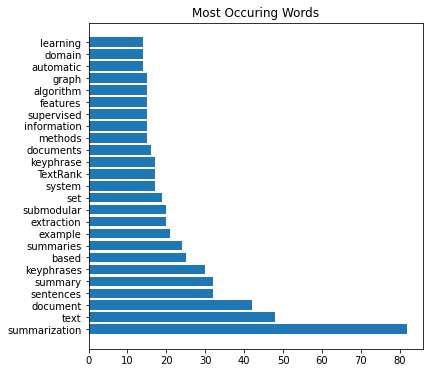

In [106]:
plt.figure(figsize=(6,6))
plt.title('Most Occuring Words')
plt.barh(range(len(res)), values, tick_label=words)
plt.show()

In [107]:
# Initialize N 
N = 25

In [108]:
test_dict = word_frequencies

In [109]:
res = dict(sorted(test_dict.items(), key = itemgetter(1), reverse = True)[:N])

In [110]:
res

{'\n\n': 57,
 'TextRank': 17,
 'algorithm': 15,
 'automatic': 14,
 'based': 25,
 'document': 42,
 'documents': 16,
 'domain': 14,
 'example': 21,
 'extraction': 20,
 'features': 15,
 'graph': 15,
 'information': 15,
 'keyphrase': 17,
 'keyphrases': 30,
 'methods': 15,
 'sentences': 32,
 'set': 19,
 'submodular': 20,
 'summaries': 24,
 'summarization': 82,
 'summary': 32,
 'supervised': 15,
 'system': 17,
 'text': 48}

In [111]:
max_frequency = max(word_frequencies.values())
max_frequency

82

## **NORMALIZING WORD FREQUENCY**

In [113]:
for word in word_frequencies.keys():
    word_frequencies[word] = word_frequencies[word]/max_frequency

In [114]:
print(word_frequencies)

{' ': 0.012195121951219513, 'Commercial': 0.012195121951219513, 'products': 0.012195121951219513, '2022': 0.012195121951219513, 'Google': 0.024390243902439025, 'Docs': 0.012195121951219513, 'released': 0.012195121951219513, 'automatic': 0.17073170731707318, 'summarization': 1.0, 'feature.[6': 0.012195121951219513, '\n\n': 0.6951219512195121, 'Approaches': 0.024390243902439025, 'general': 0.06097560975609756, 'approaches': 0.08536585365853659, 'extraction': 0.24390243902439024, 'abstraction': 0.012195121951219513, 'Extraction': 0.024390243902439025, 'based': 0.3048780487804878, 'content': 0.10975609756097561, 'extracted': 0.06097560975609756, 'original': 0.12195121951219512, 'data': 0.06097560975609756, 'modified': 0.012195121951219513, 'way': 0.15853658536585366, 'Examples': 0.012195121951219513, 'include': 0.0975609756097561, 'key': 0.06097560975609756, 'phrases': 0.07317073170731707, 'tag': 0.012195121951219513, 'index': 0.024390243902439025, 'text': 0.5853658536585366, 'document': 0

In [117]:
sent_tokens = [sent for sent in doc.sents]
print(sent_tokens[:20])

[ Commercial products
, In 2022 Google Docs released an automatic summarization feature.[6]

, Approaches
, There are two general approaches to automatic summarization: extraction and abstraction.

, Extraction-based summarization
, Here, content is extracted from the original data, but the extracted content is not modified in any way., Examples of extracted content include key-phrases that can be used to "tag" or index a text document, or key sentences (including headings) that collectively comprise an abstract, and representative images or video segments, as stated above., For text, extraction is analogous to the process of skimming, where the summary (if available), headings and subheadings, figures, the first and last paragraphs of a section, and optionally the first and last sentences in a paragraph are read before one chooses to read the entire document in detail.[7], Other examples of extraction that include key sequences of text in terms of clinical relevance (including patient